In [2]:
import pandas as pd
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 300)
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
#plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
from sklearn.naive_bayes import MultinomialNB

In [4]:
#work with countyID info filled in
with open('/home/douglas/ds/metis/metisgh/Week 4 work/fires_county_ids.pkl', 'rb') as picklefile:
    fires = pickle.load(picklefile)

In [4]:
fires.head()

,FOD_ID,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,Month,DayofWeek,DISCOVERY_TIME2,COUNTY2_x,COUNTY_ID,Cause,Prev_Lightning_Fires,Prev_Accident_Fires,Prev_Arson_Fires,Prev_Other_Fires,Prev_A_Fires,Prev_B_Fires,Prev_C_Fires,Prev_D_Fires,Prev_E_Fires,Prev_F_Fires,Prev_G_Fires,Prev_Fires_Same_Month,Prev_Fires_Same_DayofWeek,StateID
2,844425,1992-01-02,2,None,13.0,Missing/Undefined,1.0,B,33.558333,-80.329167,SC,1,Thursday,NaN,clarendon,45027,Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45
3,52822,1992-01-04,4,1400,7.0,Arson,1.0,B,31.483333,-88.750000,MS,1,Saturday,1400.0,wayne,28153,Arson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28
6,846362,1992-01-17,17,None,13.0,Missing/Undefined,0.5,B,32.604167,-80.991667,SC,1,Friday,NaN,jasper,45053,Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45
7,847880,1992-01-17,17,None,13.0,Missing/Undefined,0.5,B,34.687500,-81.570833,SC,1,Friday,NaN,union,45087,Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45
9,1128355,1992-01-18,18,None,5.0,Debris Burning,0.4,B,36.398300,-78.128300,NC,1,Saturday,NaN,warren,37185,Accident,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37


In [6]:
#A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres)
bins = [0, 10, 1000, 10000000000]
fires['CLASS'] = pd.cut(fires['FIRE_SIZE'], bins, labels=[1,2,3])

In [11]:
fires.head()

,FOD_ID,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,Month,DayofWeek,DISCOVERY_TIME2,COUNTY2_x,COUNTY_ID,Cause,Prev_Lightning_Fires,Prev_Accident_Fires,Prev_Arson_Fires,Prev_Other_Fires,Prev_A_Fires,Prev_B_Fires,Prev_C_Fires,Prev_D_Fires,Prev_E_Fires,Prev_F_Fires,Prev_G_Fires,Prev_Fires_Same_Month,Prev_Fires_Same_DayofWeek,StateID,CLASS
2,844425,1992-01-02,2,None,13.0,Missing/Undefined,1.0,B,33.558333,-80.329167,SC,1,Thursday,NaN,clarendon,45027,Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,1
3,52822,1992-01-04,4,1400,7.0,Arson,1.0,B,31.483333,-88.750000,MS,1,Saturday,1400.0,wayne,28153,Arson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,1
6,846362,1992-01-17,17,None,13.0,Missing/Undefined,0.5,B,32.604167,-80.991667,SC,1,Friday,NaN,jasper,45053,Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,1
7,847880,1992-01-17,17,None,13.0,Missing/Undefined,0.5,B,34.687500,-81.570833,SC,1,Friday,NaN,union,45087,Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,1
9,1128355,1992-01-18,18,None,5.0,Debris Burning,0.4,B,36.398300,-78.128300,NC,1,Saturday,NaN,warren,37185,Accident,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37,1


In [12]:
fires.columns

Index(['FOD_ID', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'LATITUDE', 'LONGITUDE', 'STATE', 'Month', 'DayofWeek',
       'DISCOVERY_TIME2', 'COUNTY2_x', 'COUNTY_ID', 'Cause',
       'Prev_Lightning_Fires', 'Prev_Accident_Fires', 'Prev_Arson_Fires',
       'Prev_Other_Fires', 'Prev_A_Fires', 'Prev_B_Fires', 'Prev_C_Fires',
       'Prev_D_Fires', 'Prev_E_Fires', 'Prev_F_Fires', 'Prev_G_Fires',
       'Prev_Fires_Same_Month', 'Prev_Fires_Same_DayofWeek', 'StateID',
       'CLASS'],
      dtype='object')

In [14]:
fires.drop(columns=['Prev_A_Fires', 'Prev_B_Fires', 'Prev_C_Fires',
       'Prev_D_Fires', 'Prev_E_Fires', 'Prev_F_Fires', 'Prev_G_Fires'], inplace=True)

In [15]:
fires.head(1)

,FOD_ID,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,Month,DayofWeek,DISCOVERY_TIME2,COUNTY2_x,COUNTY_ID,Cause,Prev_Lightning_Fires,Prev_Accident_Fires,Prev_Arson_Fires,Prev_Other_Fires,Prev_Fires_Same_Month,Prev_Fires_Same_DayofWeek,StateID,CLASS
2,844425,1992-01-02,2,None,13.0,Missing/Undefined,1.0,B,33.558333,-80.329167,SC,1,Thursday,NaN,clarendon,45027,Other,0.0,0.0,0.0,0.0,0.0,0.0,45,1


In [16]:
fires['CLASS'].value_counts()

1    8709
2    1235
3      56
Name: CLASS, dtype: int64

In [42]:
fires.shape

(10000, 25)

<function matplotlib.pyplot.tight_layout>

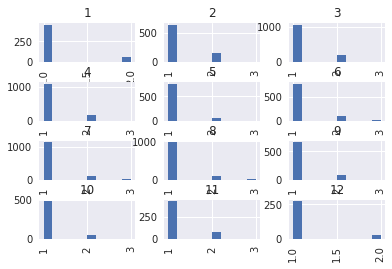

In [31]:
fires['CLASS'].hist(by=fires['Month'])
plt.tight_layout

In [44]:
x1 = np.array(fires[['LATITUDE', 'LONGITUDE']])
y1 = np.array(fires['CLASS'])

In [7]:
def cv_features(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=5)
    fs = []
    ps = []
    rs = []
    classes = [1, 2, 3]
#     print('Original dataset shape {}'.format(Counter(y_test)))
#     ros = RandomOverSampler(random_state=5)
#     X, y = ros.fit_sample(X_train, y_train)
#     print('Oversampled dataset shape {}'.format(Counter(y)))
    for train_ind, val_ind in kf.split(X, y):
        model.fit(X[train_ind],y[train_ind])
        model_preds = model.predict(X[val_ind])
        fs.append(f1_score(y[val_ind], model_preds, labels=classes, average=None))
        ps.append(precision_score(y[val_ind], model_preds, labels=classes, average=None))
        rs.append(recall_score(y[val_ind], model_preds, labels=classes, average=None))
        
    print(confusion_matrix(y[val_ind], model_preds, labels=classes)) # print for last one
    print(classification_report(y[val_ind], model_preds, labels=classes))
    return np.mean(fs, axis=0), np.mean(ps, axis=0), np.mean(rs, axis=0)

In [46]:
lr1 = LogisticRegression(C=100000)
cv_features(lr1, x1, y1)

[[1757    0    0]
 [ 234    0    0]
 [   9    0    0]]
             precision    recall  f1-score   support

          1       0.88      1.00      0.94      1757
          2       0.00      0.00      0.00       234
          3       0.00      0.00      0.00         9

avg / total       0.77      0.88      0.82      2000



(array([0.93098022, 0.        , 0.        ]),
 array([0.8709, 0.    , 0.    ]),
 array([1., 0., 0.]))

In [48]:
def cv_features_withROS(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=5)
    fs = []
    ps = []
    rs = []
    classes = [1, 2, 3]
    ros = RandomOverSampler(random_state=5)
    for train_ind, val_ind in kf.split(X, y):
        print('Original dataset shape {}'.format(Counter(y[train_ind])))
        Xos, yos = ros.fit_sample(X[train_ind],y[train_ind])
        model.fit(Xos, yos)
        print('Oversampled dataset shape {}'.format(Counter(yos)))
        model_preds = model.predict(X[val_ind])
        fs.append(f1_score(y[val_ind], model_preds, labels=classes, average=None))
        ps.append(precision_score(y[val_ind], model_preds, labels=classes, average=None))
        rs.append(recall_score(y[val_ind], model_preds, labels=classes, average=None))
    
        
    print(confusion_matrix(y[val_ind], model_preds, labels=classes)) # print for last one
    print(classification_report(y[val_ind], model_preds, labels=classes))
    return np.mean(fs, axis=0), np.mean(ps, axis=0), np.mean(rs, axis=0)

In [49]:
cv_features_withROS(lr1, x1,y1)

Original dataset shape Counter({1: 6962, 2: 994, 3: 44})
Oversampled dataset shape Counter({1: 6962, 2: 6962, 3: 6962})
Original dataset shape Counter({1: 6994, 2: 961, 3: 45})
Oversampled dataset shape Counter({1: 6994, 2: 6994, 3: 6994})
Original dataset shape Counter({1: 6961, 2: 996, 3: 43})
Oversampled dataset shape Counter({1: 6961, 2: 6961, 3: 6961})
Original dataset shape Counter({1: 6967, 2: 988, 3: 45})
Oversampled dataset shape Counter({1: 6967, 2: 6967, 3: 6967})
Original dataset shape Counter({1: 6952, 2: 1001, 3: 47})
Oversampled dataset shape Counter({1: 6952, 2: 6952, 3: 6952})
[[313 804 640]
 [ 23 165  46]
 [  1   2   6]]
             precision    recall  f1-score   support

          1       0.93      0.18      0.30      1757
          2       0.17      0.71      0.27       234
          3       0.01      0.67      0.02         9

avg / total       0.84      0.24      0.29      2000



(array([0.29290824, 0.27095616, 0.02284477]),
 array([0.91177108, 0.16975255, 0.01161155]),
 array([0.17449759, 0.67247747, 0.71270396]))

In [50]:
rf1 = RandomForestClassifier(n_estimators=1000)
cv_features(rf1, x1,y1)

[[1672   81    4]
 [ 212   22    0]
 [   6    2    1]]
             precision    recall  f1-score   support

          1       0.88      0.95      0.92      1757
          2       0.21      0.09      0.13       234
          3       0.20      0.11      0.14         9

avg / total       0.80      0.85      0.82      2000



(array([0.91990871, 0.16517249, 0.02857143]),
 array([0.88003924, 0.31030133, 0.04      ]),
 array([0.96362256, 0.11295828, 0.02222222]))

In [53]:
8709/56, 1235/56

(155.51785714285714, 22.053571428571427)

In [68]:
weights={1:1, 2:10, 3:75}
weights2={1:1, 2:12, 3:100}

In [55]:
rf1b = RandomForestClassifier(n_estimators=1000, class_weight=weights)
cv_features(rf1b,x1,y1) #best among three

[[1679   76    2]
 [ 214   20    0]
 [   7    1    1]]
             precision    recall  f1-score   support

          1       0.88      0.96      0.92      1757
          2       0.21      0.09      0.12       234
          3       0.33      0.11      0.17         9

avg / total       0.80      0.85      0.82      2000



(array([0.92129904, 0.16564009, 0.03333333]),
 array([0.88009333, 0.32394988, 0.06666667]),
 array([0.96661345, 0.11164308, 0.02222222]))

In [56]:
rf1c = RandomForestClassifier(n_estimators=1000, class_weight=weights, min_samples_leaf=5)
cv_features(rf1c,x1,y1)

[[1462  284   11]
 [ 151   81    2]
 [   6    2    1]]
             precision    recall  f1-score   support

          1       0.90      0.83      0.87      1757
          2       0.22      0.35      0.27       234
          3       0.07      0.11      0.09         9

avg / total       0.82      0.77      0.79      2000



(array([0.87043612, 0.30286609, 0.05785107]),
 array([0.90187197, 0.25387631, 0.07539683]),
 array([0.84119427, 0.37659232, 0.05858586]))

In [57]:
rf1d = RandomForestClassifier(n_estimators=1000, class_weight=weights, min_samples_leaf=2)
cv_features(rf1d,x1,y1)

[[1598  153    6]
 [ 196   37    1]
 [   6    2    1]]
             precision    recall  f1-score   support

          1       0.89      0.91      0.90      1757
          2       0.19      0.16      0.17       234
          3       0.12      0.11      0.12         9

avg / total       0.80      0.82      0.81      2000



(array([0.90776422, 0.22861585, 0.02352941]),
 array([0.88645502, 0.28403289, 0.025     ]),
 array([0.93024934, 0.19273368, 0.02222222]))

# Add Month

In [58]:
x2 = np.array(fires[['LATITUDE', 'LONGITUDE', 'Month']])
y2 = np.array(fires['CLASS'])

In [59]:
lr2 = LogisticRegression(C=100000, class_weight=weights)
cv_features(lr2, x2, y2)

[[1738   19    0]
 [ 233    1    0]
 [   9    0    0]]
             precision    recall  f1-score   support

          1       0.88      0.99      0.93      1757
          2       0.05      0.00      0.01       234
          3       0.00      0.00      0.00         9

avg / total       0.78      0.87      0.82      2000



(array([0.9254459 , 0.01471937, 0.        ]),
 array([0.87041323, 0.08616258, 0.        ]),
 array([0.98794842, 0.00807015, 0.        ]))

In [60]:
rf2 = RandomForestClassifier(n_estimators=1000, class_weight=weights)
cv_features(rf2,x2,y2)

[[1712   45    0]
 [ 214   20    0]
 [   8    1    0]]
             precision    recall  f1-score   support

          1       0.89      0.97      0.93      1757
          2       0.30      0.09      0.13       234
          3       0.00      0.00      0.00         9

avg / total       0.81      0.87      0.83      2000



(array([0.92400302, 0.1443942 , 0.        ]),
 array([0.87840543, 0.33940623, 0.        ]),
 array([0.97463583, 0.09199356, 0.        ]))

# Set 3

In [62]:
x3 = np.array(fires[['Month', 'LATITUDE', 'LONGITUDE', 'Prev_Lightning_Fires']])
y3 = np.array(fires['CLASS'])


In [63]:
rf3 = RandomForestClassifier(n_estimators=1000, class_weight=weights)
cv_features(rf3,x3,y3)

[[1727   30    0]
 [ 210   24    0]
 [   8    1    0]]
             precision    recall  f1-score   support

          1       0.89      0.98      0.93      1757
          2       0.44      0.10      0.17       234
          3       0.00      0.00      0.00         9

avg / total       0.83      0.88      0.84      2000



(array([0.92758038, 0.13946911, 0.        ]),
 array([0.87838406, 0.40764271, 0.        ]),
 array([0.98266572, 0.08459302, 0.        ]))

In [65]:
rf3b = RandomForestClassifier(n_estimators=1000, class_weight=weights, min_samples_leaf=2)
cv_features(rf3,x3,y3)

[[1728   29    0]
 [ 212   22    0]
 [   8    1    0]]
             precision    recall  f1-score   support

          1       0.89      0.98      0.93      1757
          2       0.42      0.09      0.15       234
          3       0.00      0.00      0.00         9

avg / total       0.83      0.88      0.84      2000



(array([0.92773487, 0.14194017, 0.        ]),
 array([0.87856261, 0.41322058, 0.        ]),
 array([0.98277019, 0.08593038, 0.        ]))

In [66]:
x4 = np.array(fires[['Month', 'LATITUDE', 'LONGITUDE', 'Prev_Lightning_Fires','Prev_Accident_Fires',
       'Prev_Arson_Fires', 'Prev_Other_Fires']])
y4 = np.array(fires['CLASS'])


In [69]:
rf4 = RandomForestClassifier(n_estimators=1000, class_weight=weights2, min_samples_leaf=2)
cv_features(rf4, x4, y4)

[[1668   89    0]
 [ 190   43    1]
 [   8    1    0]]
             precision    recall  f1-score   support

          1       0.89      0.95      0.92      1757
          2       0.32      0.18      0.23       234
          3       0.00      0.00      0.00         9

avg / total       0.82      0.86      0.84      2000



(array([0.91678225, 0.19241658, 0.        ]),
 array([0.88253832, 0.30252202, 0.        ]),
 array([0.95388203, 0.14215392, 0.        ]))

# Add 'Prev_Fires_Same_Month', 'Prev_Fires_Same_DayofWeek'

In [70]:
    x5 = np.array(fires[['Month', 'LATITUDE', 'LONGITUDE', 'Prev_Lightning_Fires','Prev_Accident_Fires',
           'Prev_Arson_Fires', 'Prev_Other_Fires', 'Prev_Fires_Same_Month', 'Prev_Fires_Same_DayofWeek']])
    y5 = np.array(fires['CLASS'])


In [75]:
rf5 = RandomForestClassifier(n_estimators=1000, class_weight=weights2, max_depth=15)
cv_features(rf5, x5, y5)

[[1505  252    0]
 [ 152   81    1]
 [   8    1    0]]
             precision    recall  f1-score   support

          1       0.90      0.86      0.88      1757
          2       0.24      0.35      0.29       234
          3       0.00      0.00      0.00         9

avg / total       0.82      0.79      0.81      2000



(array([0.87749225, 0.28141006, 0.        ]),
 array([0.89500453, 0.24806912, 0.        ]),
 array([0.86076093, 0.32678089, 0.        ]))

In [79]:
rf5b = RandomForestClassifier(n_estimators=1000)
cv_features_withROS(rf5, x5, y5)

Original dataset shape Counter({1: 6962, 2: 994, 3: 44})
Oversampled dataset shape Counter({1: 6962, 2: 6962, 3: 6962})
Original dataset shape Counter({1: 6994, 2: 961, 3: 45})
Oversampled dataset shape Counter({1: 6994, 2: 6994, 3: 6994})
Original dataset shape Counter({1: 6961, 2: 996, 3: 43})
Oversampled dataset shape Counter({1: 6961, 2: 6961, 3: 6961})
Original dataset shape Counter({1: 6967, 2: 988, 3: 45})
Oversampled dataset shape Counter({1: 6967, 2: 6967, 3: 6967})
Original dataset shape Counter({1: 6952, 2: 1001, 3: 47})
Oversampled dataset shape Counter({1: 6952, 2: 6952, 3: 6952})
[[813 779 165]
 [ 50 168  16]
 [  2   4   3]]
             precision    recall  f1-score   support

          1       0.94      0.46      0.62      1757
          2       0.18      0.72      0.28       234
          3       0.02      0.33      0.03         9

avg / total       0.85      0.49      0.58      2000



(array([0.61719168, 0.28379349, 0.04024074]),
 array([0.9273853 , 0.17935278, 0.02128328]),
 array([0.46309654, 0.68328325, 0.37564103]))

In [80]:
weights3 = {1:1, 2:18, 3:130} 
rf5c = RandomForestClassifier(n_estimators=1000, class_weight=weights3)
cv_features_withROS(rf5c, x5, y5)

Original dataset shape Counter({1: 6962, 2: 994, 3: 44})
Oversampled dataset shape Counter({1: 6962, 2: 6962, 3: 6962})
Original dataset shape Counter({1: 6994, 2: 961, 3: 45})
Oversampled dataset shape Counter({1: 6994, 2: 6994, 3: 6994})
Original dataset shape Counter({1: 6961, 2: 996, 3: 43})
Oversampled dataset shape Counter({1: 6961, 2: 6961, 3: 6961})
Original dataset shape Counter({1: 6967, 2: 988, 3: 45})
Oversampled dataset shape Counter({1: 6967, 2: 6967, 3: 6967})
Original dataset shape Counter({1: 6952, 2: 1001, 3: 47})
Oversampled dataset shape Counter({1: 6952, 2: 6952, 3: 6952})
[[1667   89    1]
 [ 198   35    1]
 [   7    2    0]]
             precision    recall  f1-score   support

          1       0.89      0.95      0.92      1757
          2       0.28      0.15      0.19       234
          3       0.00      0.00      0.00         9

avg / total       0.81      0.85      0.83      2000



(array([0.91507073, 0.17698256, 0.        ]),
 array([0.88084643, 0.27891108, 0.        ]),
 array([0.95215266, 0.13059184, 0.        ]))

In [76]:
x6 = np.array(fires[['Month', 'Prev_Lightning_Fires', 'Prev_Accident_Fires',
       'Prev_Arson_Fires', 'Prev_Other_Fires', 'Prev_Fires_Same_Month', 'Prev_Fires_Same_DayofWeek', 'LATITUDE', 'LONGITUDE', 'StateID']])
y6= np.array(fires['CLASS'])

In [77]:
rf6 = RandomForestClassifier(n_estimators=1000, class_weight=weights2, max_depth=16)
cv_features(rf6, x6, y6)

[[1596  161    0]
 [ 172   62    0]
 [   8    1    0]]
             precision    recall  f1-score   support

          1       0.90      0.91      0.90      1757
          2       0.28      0.26      0.27       234
          3       0.00      0.00      0.00         9

avg / total       0.82      0.83      0.83      2000



(array([0.89852164, 0.25627174, 0.        ]),
 array([0.88932018, 0.27218489, 0.        ]),
 array([0.9080772 , 0.24441948, 0.        ]))

In [8]:
x7 = np.array(fires[['Month', 'Prev_Lightning_Fires', 'Prev_Accident_Fires',
       'Prev_Arson_Fires', 'Prev_Other_Fires', 'Prev_Fires_Same_Month', 'Prev_Fires_Same_DayofWeek', 'LATITUDE', 'LONGITUDE', 'StateID', 'COUNTY_ID']])
y7= np.array(fires['CLASS'])

In [84]:
rf7 = RandomForestClassifier(n_estimators=1000, class_weight=weights2)
cv_features(rf7, x7, y7)

[[1734   23    0]
 [ 218   16    0]
 [   9    0    0]]
             precision    recall  f1-score   support

          1       0.88      0.99      0.93      1757
          2       0.41      0.07      0.12       234
          3       0.00      0.00      0.00         9

avg / total       0.82      0.88      0.83      2000



(array([0.92894483, 0.09883236, 0.        ]),
 array([0.87599717, 0.40788812, 0.        ]),
 array([0.98874797, 0.05633319, 0.        ]))

In [85]:
rf7 = RandomForestClassifier(n_estimators=1000, class_weight=weights2, min_samples_leaf=4)
cv_features(rf7, x7, y7)

[[1570  185    2]
 [ 170   63    1]
 [   7    1    1]]
             precision    recall  f1-score   support

          1       0.90      0.89      0.90      1757
          2       0.25      0.27      0.26       234
          3       0.25      0.11      0.15         9

avg / total       0.82      0.82      0.82      2000



(array([0.89688295, 0.2933042 , 0.03076923]),
 array([0.89600322, 0.29165566, 0.05      ]),
 array([0.89786249, 0.29664183, 0.02222222]))

In [86]:
rf7 = RandomForestClassifier(n_estimators=1000, class_weight=weights2, min_samples_leaf=4, max_features='log2')
cv_features(rf7, x7, y7)

[[1564  190    3]
 [ 168   65    1]
 [   7    1    1]]
             precision    recall  f1-score   support

          1       0.90      0.89      0.89      1757
          2       0.25      0.28      0.27       234
          3       0.20      0.11      0.14         9

avg / total       0.82      0.81      0.82      2000



(array([0.89473437, 0.28548892, 0.02857143]),
 array([0.89505378, 0.28210937, 0.04      ]),
 array([0.89454573, 0.29109479, 0.02222222]))

In [12]:
rf7b = RandomForestClassifier(n_estimators=1000, class_weight='balanced', max_depth=20)
cv_features(rf7b, x7, y7)

[[1722   35    0]
 [ 216   17    1]
 [   9    0    0]]
             precision    recall  f1-score   support

          1       0.88      0.98      0.93      1757
          2       0.33      0.07      0.12       234
          3       0.00      0.00      0.00         9

avg / total       0.82      0.87      0.83      2000



(array([0.92672029, 0.11624193, 0.        ]),
 array([0.87692765, 0.35824176, 0.        ]),
 array([0.98255509, 0.06965919, 0.        ]))

In [98]:
from sklearn.model_selection import GridSearchCV
max_depth_range = [None,4,20]
max_features = ['auto','log2']
min_sample_leaf = [1,2,4]
weight_range = [weights, weights3]
param_grid = {'max_depth':max_depth_range, 'min_samples_leaf':min_sample_leaf, 'class_weight':weight_range, 'max_features':max_features}
grid = GridSearchCV(rf7, param_grid, cv=5, scoring='f1_weighted')

In [99]:
grid.fit(x7, y7)

KeyboardInterrupt: 